## Imperial-UCL Numerics seminar

In [1]:
using IFSintegrals, Plots, LaTeXStrings

## Example one: sketching a fractal from its IFS

Generate a set of 10 random points in $(0,1)^2$

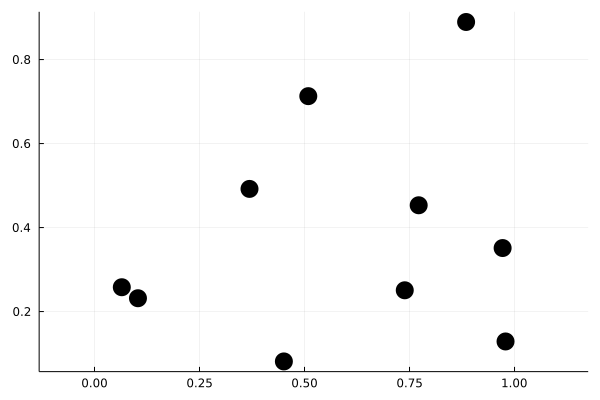

In [17]:
X = [rand(2) for _=1:10]
Xm = hcat(X...)
scatter(Xm[1,:],Xm[2,:],legend=:false,markersize=10, 
        markercolor="black",aspect_ratio=:equal)

Define some similarities of the form $s_m(x)=rx+\delta_m$. The syntax describing each map here is ```Similarity(contraction, translation)```.

In [3]:
s₁ = Similarity(1/3,[0.0,0.0])
s₂ = Similarity(1/3,[2/3,0.0])
s₃ = Similarity(1/3,[0.0,2/3])
s₄ = Similarity(1/3,[2/3,2/3]);

An iterated function system (IFS) can be reprersented as an array of similarities:

In [4]:
IFS = [s₁, s₂, s₃, s₄];

The full map is defined mathematically as $S(X) := \cup_{m=1}^Ms_m(X)$. We can apply this iteratively to our original set of random points.

In [8]:
Xm

2×160 Matrix{Float64}:
 0.0908909  0.0904568  0.0253788   0.0754998  …  0.9073    0.972233  0.957691
 0.0693252  0.034092   0.00911821  0.104799      0.953784  0.961717  0.918017

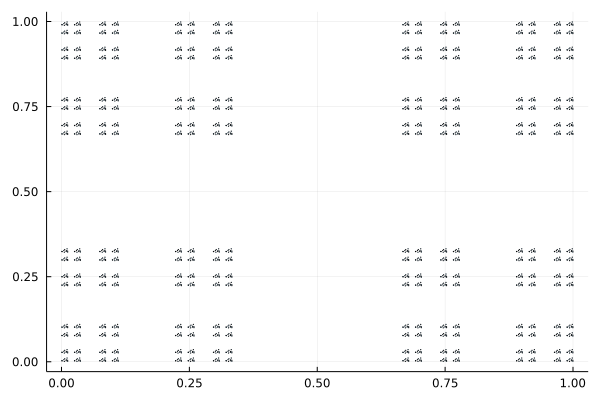

In [21]:
X = full_map(IFS,X)
Xm = hcat(X...)
scatter(Xm[1,:],Xm[2,:],legend=:false,markersize=0.5)

## Example two: quadrature rule on an IFS attractor

In [22]:
Γ = Attractor(IFS);

In [39]:
Γ.Hausdorff_dimension

1.2618595071429148

In [23]:
h = 0.01
x,w = barycentre_rule(Γ,h);

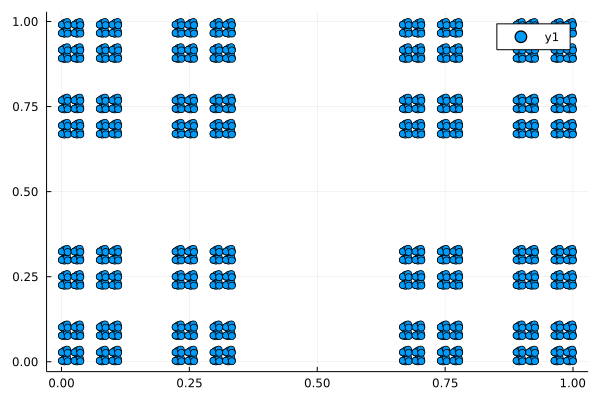

In [29]:

Xm = hcat(X...)
scatter(Xm[1,:],Xm[2,:])

## Example three: Acoustic scattering

In [30]:
k = 53 # wavenumber
d = [0 0 -1] # incoming wave direction
f(x) = exp(im*k*(d[1:2]'*x)); # RHS data

In [31]:
S = SingleLayer(Γ, k); # single layer integral operator defined on fractal Γ

In [41]:
h_BEM = 0.01
h_QUAD = 0.001
Sₕ = DiscreteBIO(S,h_BEM=h_BEM,h_quad=h_QUAD); #discretise BIO

Constructing BEM system 100%|███████████████████████████| Time: 0:00:01


In [42]:
ϕₕ = Sₕ\f; # solve the discrete problem

The rest of the code is just making a slice plot...

In [43]:
h=0.01 # adujust this for more acurate / faster plots
z_val = - 0.1
x_1 = [j for j=0:h:1] # !!! ADJUST THESE IF fractal is outside [0,1]²
x_2 = [j for j=0:h:1]
X_1 = repeat(x_1, outer=(1,length(x_2)))
X_2 = copy(transpose(repeat(x_2, outer=(1,length(x_1)))))
N = length(x_1)*length(x_2)
X = [reshape(X_1, (N,)) reshape(X_2, (N,)) z_val*ones(Float64,N)]
uˢ = - single_layer_potential(Γ,k,ϕₕ,X)
uⁱ(x) = exp.(im*k*(x*d'))[:] # define inc field in domain
uᵗ = uⁱ(X) + uˢ
vals = reshape(uᵗ,(length(x_1),length(x_2)));

LoadError: MethodError: no method matching single_layer_potential(::Attractor{StaticArrays.SVector{2, Float64}, StaticArrays.SMatrix{2, 2, Float64, 4}}, ::Int64, ::Projection{StaticArrays.SVector{2, Float64}, StaticArrays.SMatrix{2, 2, Float64, 4}}, ::Matrix{Float64})
[0mClosest candidates are:
[0m  single_layer_potential([91m::Projection{V, M}[39m, ::Real; h_quad) where {V<:(AbstractVector), M<:Union{Real, AbstractMatrix}} at ~/OneDrive/IFSintegrals/src/screen_scattering.jl:31
[0m  single_layer_potential([91m::Projection{V, M}[39m, ::Real; h_quad) where {V<:Real, M<:Real} at ~/OneDrive/IFSintegrals/src/screen_scattering.jl:48

In [ ]:
heatmap(x_1,x_2,transpose(abs.(uˢ)),  aspect_ratio = 1, 
    title=L"|u^s|", legend=true, c = :thermal)